In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, accuracy_score, roc_auc_score, confusion_matrix

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:
#loading full dataset
df = pd.read_csv("2021_Competition_Training.csv")
df.set_index(["ID"], inplace = True)
df.head()

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,8,9,11,13,16,20,26,28,29,31,33,51,55,58,62,64,66,68,75,85,102,124,127,131,132,135,160,174,180,187,192,202,209,210,211,215,220,230,234,240,243,247,251,255,261,285,293,297,300,305,306,309,323,334,344,345,352,353,355,359) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,auth_3mth_post_acute_dia,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ip_snf_net_paid_pmpm_cost_9to12m_b4,auth_3mth_acute_ckd,bh_ncal_pmpm_ct,...,auth_3mth_post_acute_end,auth_3mth_acute_mus,atlas_perpov_1980_0711,atlas_pct_laccess_white15,auth_3mth_post_acute_mean_los,rx_gpi2_66_pmpm_ct,auth_3mth_acute_gus,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4,atlas_low_education_2015_update,race_cd
ID,,,,,,,,,,,,,,,,,,,,,
1MObcfaSTac85Lca0Y8bbA6I,0,0,0.000000,7.910346,0.049413,0.000000,46.839102,0.0,0,0.0,...,0,0,0.0,26.842903,0.0,0.000000,0,Inc_1x-2x,0.0,1.0
5M89OSTL580dYeA849d3480I,1,0,0.000000,1.730272,0.095624,60.000000,36.721923,NaN,0,0.0,...,0,0,0.0,11.405128,0.0,0.000000,0,New,0.0,1.0
MdOS23TLe18Y60043Acfa2I9,2,0,0.000000,5.015501,0.022398,30.000000,39.605015,0.0,0,0.0,...,0,0,0.0,1.713138,0.0,0.083333,0,Inc_1x-2x,0.0,1.0
2ccMO510abSaT79cLfaYAIe4,3,0,2.266667,4.049586,0.070407,50.000000,93.694818,0.0,0,0.0,...,0,0,0.0,11.853595,0.0,0.000000,0,Dec_1x-2x,0.0,1.0
0M9811Ocb1ST94LY3f5A9I00,4,0,0.000000,0.618606,0.074862,88.272489,36.298252,0.0,0,0.0,...,0,0,0.0,33.795298,0.0,0.000000,0,Dec_1x-2x,0.0,1.0


In [3]:
df = df.drop(["rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4", "Unnamed: 0",'lang_spoken_cd',"mabh_seg","cons_ltmedicr","hedis_dia_hba1c_ge9"], axis = 1)

In [4]:
#dividing into features and labels
reduced = df.copy() 
x= reduced.loc[:, reduced.columns != 'covid_vaccination']
y = reduced['covid_vaccination']
y = ["1" if i == "vacc" else "0" for i in y]
print(y[:5])
print(reduced['covid_vaccination'][:5])

['0', '0', '0', '0', '0']
ID
1MObcfaSTac85Lca0Y8bbA6I    no_vacc
5M89OSTL580dYeA849d3480I    no_vacc
MdOS23TLe18Y60043Acfa2I9    no_vacc
2ccMO510abSaT79cLfaYAIe4    no_vacc
0M9811Ocb1ST94LY3f5A9I00    no_vacc
Name: covid_vaccination, dtype: object


In [5]:

x = pd.get_dummies(x)
x.shape


(974842, 1253)

In [6]:
x_no_dup = x.copy()
x_no_dup = x_no_dup.loc[:,~x_no_dup.columns.duplicated()]
x_no_dup.shape


(974842, 1043)

In [7]:
#split into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x_no_dup,y,test_size = 0.2, random_state = 42)
print(x_train.shape,x_test.shape)
print(y_test[0:5])

(779873, 1043) (194969, 1043)
['0', '0', '0', '0', '0']


In [8]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=300,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)



In [9]:
#imp_df.to_csv("Features_Importance_Final.csv")
imp_df=pd.read_csv("Features_Importance_Final.csv", index_col = 0)
imp_df.head()


,Feature_name,Importance
0,rx_gpi2_72_pmpm_cost_6to9m_b4,0.000977
1,atlas_pct_laccess_child15,0.001134
2,atlas_recfacpth14,0.001014
3,atlas_pct_fmrkt_frveg16,0.001214
4,atlas_pct_free_lunch14,0.001085


In [10]:
imp_df.sort_values(by = "Importance", ascending = False).head()
len(imp_df[imp_df["Importance"]==0])
imp_feat = imp_df[imp_df["Importance"]!=0]



In [11]:
#rerun model with fewer features:
x_red = x_no_dup.copy()
x_red = x_red[imp_feat["Feature_name"]]
x_red.shape

(974842, 278)

In [12]:
#train_test_split with fewer features
x_train, x_test, y_train, y_test = train_test_split(x_red,y,test_size = 0.2, random_state = 42)
print(x_train.shape,x_test.shape)
print(y_test[0:5])

(779873, 278) (194969, 278)
['0', '0', '0', '0', '0']


C:\Users\patri\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.8259


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


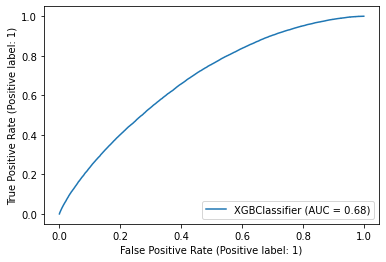

In [16]:
xgb3_model2 = xgb3.fit(x_train, y_train, eval_metric='auc')

pred = xgb3_model2.predict(x_test)
predprob = xgb3_model2.predict_proba(x_test)
        

print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_test, pred))
plot_roc_curve(xgb3_model2, x_test, y_test)
plt.show()

In [ ]:
#filename = 'finalized_model2.sav'
#pickle.dump(xgb3_model2, open(filename, 'wb'))

In [ ]:
#Feature Importance of Model 2
imp_dict = {}
for i in range(x_red.shape[1]):
    name = x_red.columns[i]
    imp = xgb3_model2.feature_importances_[i]
    imp_dict[i]=name,imp
    
imp_df = pd.DataFrame(imp_dict)
imp_df = imp_df.T
imp_df = imp_df.rename(columns = {0:"Feature_name", 1: "Importance"})
imp_df.head()

In [ ]:
imp_df.sort_values(by = "Importance", ascending = False).head()
len(imp_df[imp_df["Importance"]==0])
imp_feat = imp_df[imp_df["Importance"]!=0]

In [ ]:
imp_df.to_csv("Features_Importance_Final2.csv")

In [ ]:
val_df = pd.read_csv("2021_Competition_Holdout.csv")
val_df.set_index(["ID"], inplace = True)

val_df.head()

In [ ]:
val_df = val_df.drop(["rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4", "Unnamed: 0",'lang_spoken_cd',"mabh_seg","cons_ltmedicr","hedis_dia_hba1c_ge9"], axis = 1)

In [ ]:
x_val = val_df.copy()
x_val = pd.get_dummies(x_val)
x_val_no_dup = x_val.copy()
x_val_no_dup = x_val_no_dup.loc[:,~x_val_no_dup.columns.duplicated()]
x_val_no_dup = x_val_no_dup[imp_feat["Feature_name"]]
x_val_no_dup.shape


In [ ]:
val_pred = xgb3_model2.predict(x_val_no_dup)

In [ ]:
val_predprobs = xgb3_model2.predict_proba(x_val_no_dup)

In [ ]:
val_predprobs[:3,:]
#val_probs = pd.DataFrame(val_predprobs)
#val_probs.head()

In [ ]:
report = pd.DataFrame(index = x_val_no_dup.index, columns = ["Score", "Ranking"])
report["Score"] = val_predprobs[:,0]
report["Ranking"]= report["Score"].rank(ascending = False)


report.head()

In [ ]:
report[report["Ranking"]==report["Ranking"].min()]

In [ ]:
report.to_csv("CaseCompetition2021_Richard_Rodriguez_20211010.csv")

In [15]:
#Importance Graphs
imp = pd.read_csv("Features_Importance_Final2.csv", index_col = 0)
most_imp = imp.sort_values(by = "Importance", ascending = False)

In [ ]:
most_imp